<a href="https://colab.research.google.com/github/buchi0804/Meteorological_Data_Analysis./blob/main/Meteorological_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv(r'E:\weatherHistory.csv')
data1 = data

In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data.shape

(96453, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
data['Loud Cover'].unique()

array([0.])

In [ ]:
data.drop('Loud Cover',axis=1,inplace=True)

In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [ ]:
data = data.fillna(method='ffill')

In [ ]:
data['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [ ]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Formatted Date'].head()

0   2006-03-31 22:00:00+00:00
1   2006-03-31 23:00:00+00:00
2   2006-04-01 00:00:00+00:00
3   2006-04-01 01:00:00+00:00
4   2006-04-01 02:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

In [ ]:
data = data.set_index('Formatted Date')
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
sns.set_style(style='whitegrid')

In [ ]:
correlation = data.corr()

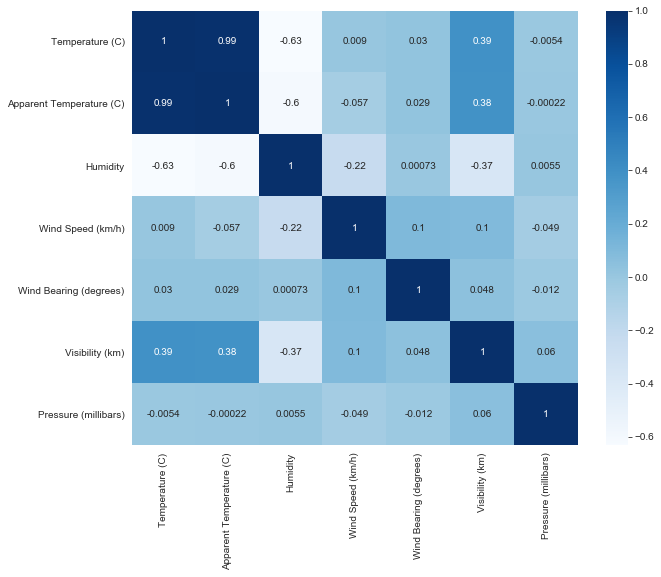

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.show()

In [ ]:
indices = ['Temperature (C)', 'Humidity','Precip Type', 'Summary']
extr_data = data.loc[:,indices]
extr_data.head()

,Temperature (C),Humidity,Precip Type,Summary
Formatted Date,,,,
2006-03-31 22:00:00+00:00,9.472222,0.89,rain,Partly Cloudy
2006-03-31 23:00:00+00:00,9.355556,0.86,rain,Partly Cloudy
2006-04-01 00:00:00+00:00,9.377778,0.89,rain,Mostly Cloudy
2006-04-01 01:00:00+00:00,8.288889,0.83,rain,Partly Cloudy
2006-04-01 02:00:00+00:00,8.755556,0.83,rain,Mostly Cloudy


In [ ]:
def year_plot(year):
    data = extr_data[extr_data.index.year==year]
    plt.figure(figsize=(8,4))
    plt.title('Temperature vs Humidity for {}'.format(year))
    sns.scatterplot(x=data.iloc[:,0],
                    y=data.iloc[:,1],
                    hue=data.iloc[:,2],
                    s=50,
                    alpha=0.3)
    plt.show()
    print(data.describe())
    print('-'*70)

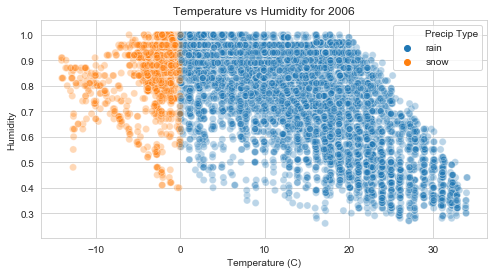

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.215225     0.767349
std           9.597856     0.174838
min         -14.088889     0.260000
25%           2.805556     0.650000
50%          11.711111     0.810000
75%          18.209722     0.920000
max          34.005556     1.000000
----------------------------------------------------------------------


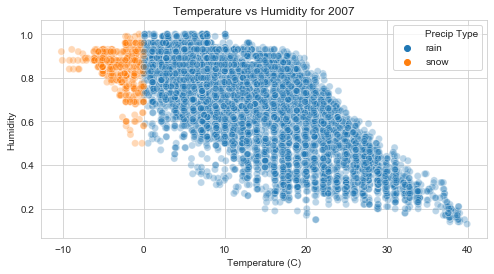

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.134677     0.689647
std           9.384959     0.199642
min         -10.155556     0.130000
25%           5.033333     0.550000
50%          11.138889     0.740000
75%          18.800000     0.850000
max          39.905556     1.000000
----------------------------------------------------------------------


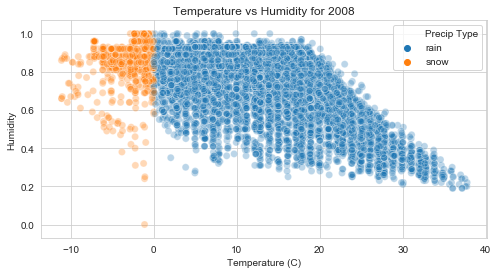

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         12.161819     0.701239
std           9.177221     0.184552
min         -11.127778     0.000000
25%           5.583333     0.570000
50%          11.577778     0.740000
75%          18.656944     0.850000
max          37.755556     1.000000
----------------------------------------------------------------------


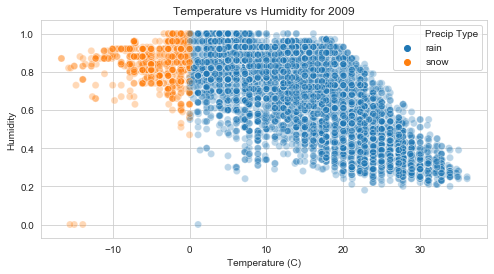

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.269682     0.707247
std           9.769443     0.204392
min         -16.666667     0.000000
25%           5.000000     0.560000
50%          12.508333     0.760000
75%          19.894444     0.880000
max          36.111111     1.000000
----------------------------------------------------------------------


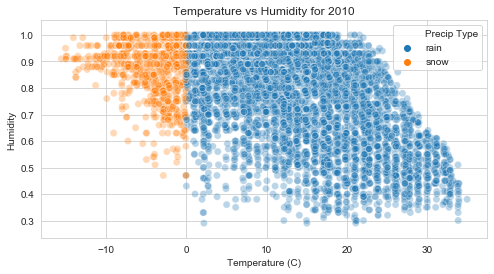

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         11.200176     0.796861
std           9.651203     0.168371
min         -15.483333     0.290000
25%           3.750000     0.690000
50%          11.975000     0.850000
75%          17.800000     0.930000
max          34.927778     1.000000
----------------------------------------------------------------------


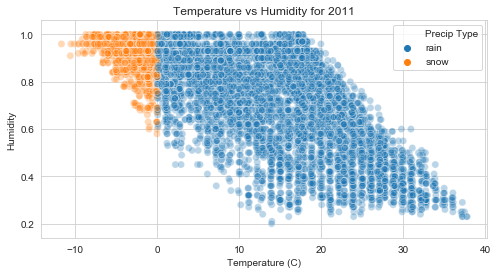

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.524934     0.736008
std          10.138539     0.202678
min         -11.700000     0.200000
25%           2.665278     0.590000
50%          11.688889     0.790000
75%          18.945833     0.910000
max          37.800000     1.000000
----------------------------------------------------------------------


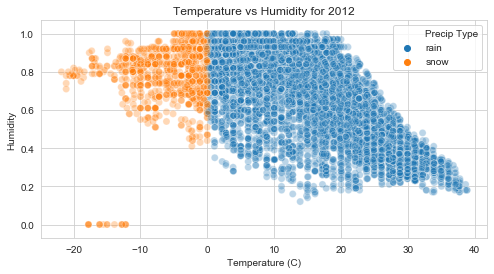

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         11.986824     0.689513
std          11.021216     0.218004
min         -21.822222     0.000000
25%           3.793056     0.527500
50%          12.222222     0.730000
75%          20.000000     0.870000
max          38.861111     1.000000
----------------------------------------------------------------------


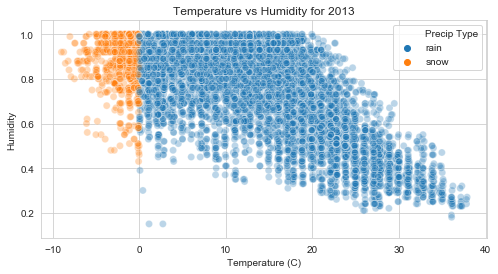

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.941017     0.754197
std           9.389492     0.194925
min          -8.983333     0.150000
25%           3.943056     0.630000
50%          11.941667     0.800000
75%          18.750000     0.920000
max          37.872222     1.000000
----------------------------------------------------------------------


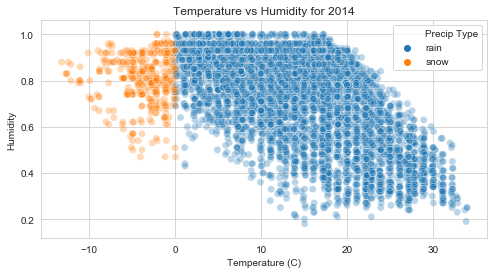

       Temperature (C)     Humidity
count      8757.000000  8757.000000
mean         12.528228     0.748571
std           8.184753     0.183548
min         -13.255556     0.180000
25%           6.600000     0.640000
50%          12.355556     0.800000
75%          18.344444     0.900000
max          33.911111     1.000000
----------------------------------------------------------------------


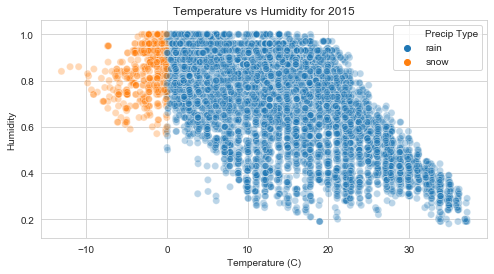

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.312088     0.732354
std           9.366111     0.200232
min         -13.066667     0.180000
25%           4.433333     0.590000
50%          12.055556     0.780000
75%          18.911111     0.900000
max          37.194444     1.000000
----------------------------------------------------------------------


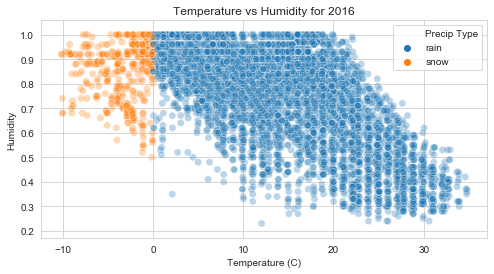

       Temperature (C)     Humidity
count      8783.000000  8783.000000
mean         11.987381     0.760868
std           9.029420     0.182269
min         -10.133333     0.230000
25%           4.788889     0.650000
50%          11.088889     0.810000
75%          18.800000     0.900000
max          34.811111     1.000000
----------------------------------------------------------------------


In [ ]:
for year in range(2006,2017):
    year_plot(year)

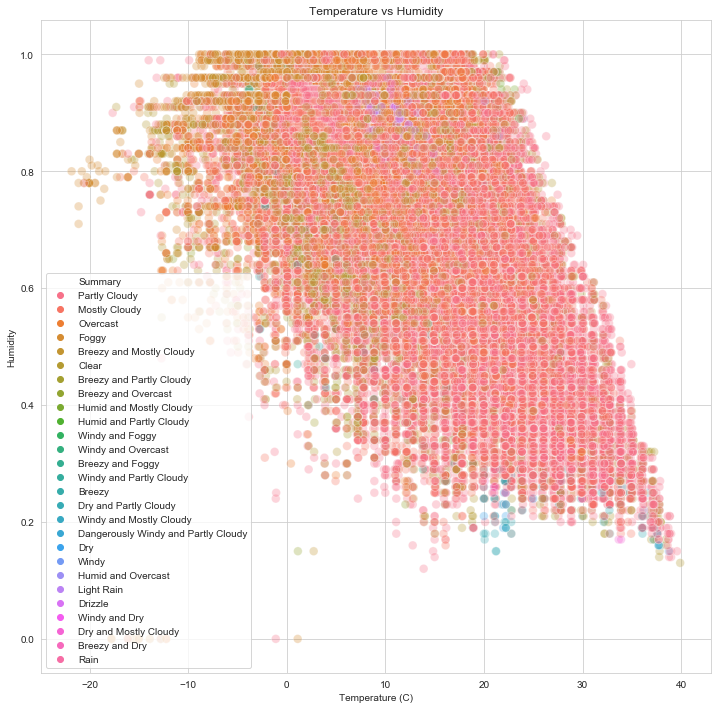

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=extr_data.iloc[:,0],
                y=extr_data.iloc[:,1],
                hue=extr_data.iloc[:,3],
                s=75,
                alpha=0.3)
plt.show()

       Temperature (C)      Humidity
count     96453.000000  96453.000000
mean         11.932678      0.734899
std           9.551546      0.195473
min         -21.822222      0.000000
25%           4.688889      0.600000
50%          12.000000      0.780000
75%          18.838889      0.890000
max          39.905556      1.000000


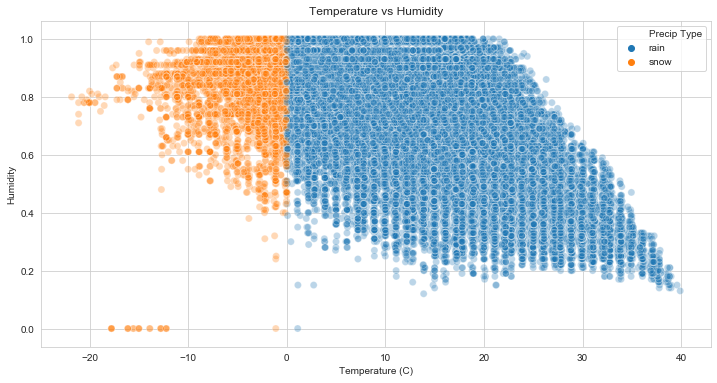

In [ ]:
plt.figure(figsize=(12,6))
print(extr_data.describe())
plt.title('Temperature vs Humidity')
sns.scatterplot(x=extr_data.iloc[:,0],
                y=extr_data.iloc[:,1],
                hue=extr_data.iloc[:,2],
                s=50,
                alpha=0.3)
plt.show()

In [ ]:
monthlydf = data.iloc[:,3:5].resample('M').mean()
monthlydf.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


In [ ]:
TEMP_DATA = monthlydf.iloc[:,0]
HUM_DATA = monthlydf.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'


In [ ]:
normed_data = (monthlydf - monthlydf.min()) / (monthlydf.max() - monthlydf.min())
normed_data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,0.142978,0.918483
2006-01-31 00:00:00+00:00,0.139267,0.790898
2006-02-28 00:00:00+00:00,0.174747,0.811299
2006-03-31 00:00:00+00:00,0.323521,0.662198
2006-04-30 00:00:00+00:00,0.627308,0.546771


In [ ]:
data1['Formatted Date'] = pd.to_datetime(data1['Formatted Date'],utc=True)
data1['Year'] = pd.DatetimeIndex(data1['Formatted Date']).year
data1['Month'] = pd.DatetimeIndex(data1['Formatted Date']).month
data1['Day'] = pd.DatetimeIndex(data1['Formatted Date']).day
data1['Hour'] = pd.DatetimeIndex(data1['Formatted Date']).hour

In [ ]:
monthlydf= data1
monthlydf.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year,Month,Day,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006,4,1,2


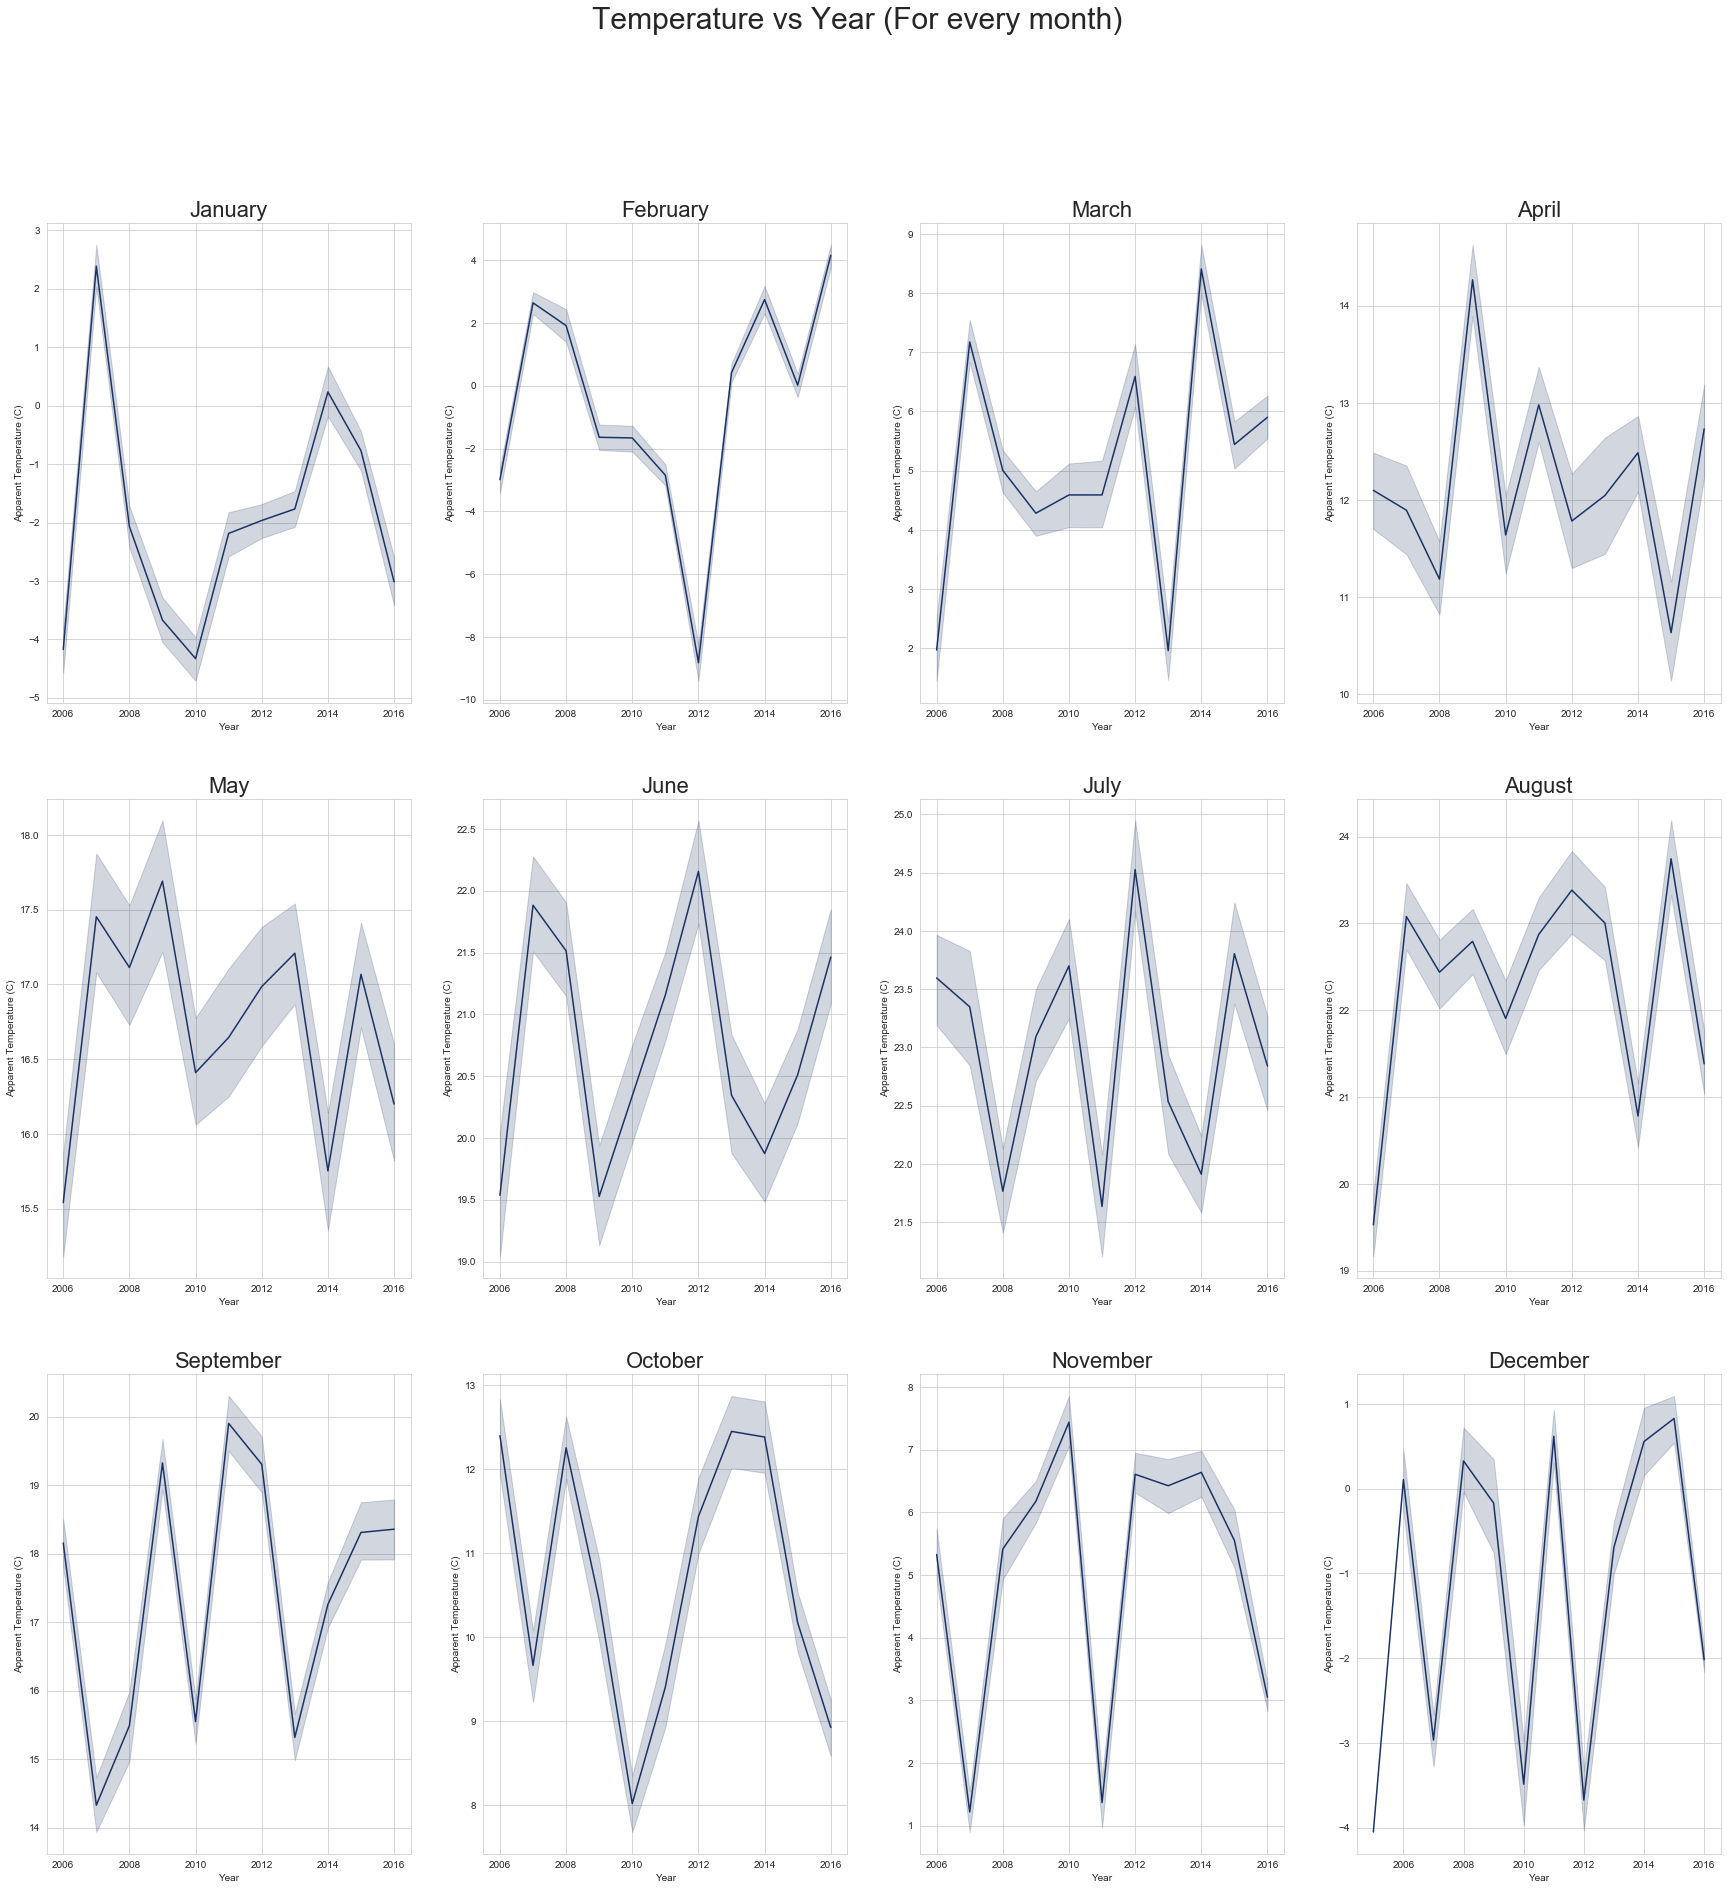

In [ ]:
fig,axes = plt.subplots(3,4)
fig.set_figheight(30)
fig.set_figwidth(30)
fig.suptitle("Temperature vs Year (For every month)",fontsize=30)
axes[0,0].set_title("January",fontsize=22)
axes[0,1].set_title("February",fontsize=22)
axes[0,2].set_title("March",fontsize=22)
axes[0,3].set_title("April",fontsize=22)
axes[1,0].set_title("May",fontsize=22)
axes[1,1].set_title("June",fontsize=22)
axes[1,2].set_title("July",fontsize=22)
axes[1,3].set_title("August",fontsize=22)
axes[2,0].set_title("September",fontsize=22)
axes[2,1].set_title("October",fontsize=22)
axes[2,2].set_title("November",fontsize=22)
axes[2,3].set_title("December",fontsize=22)
sns.lineplot(ax=axes[0,0],x=monthlydf[monthlydf['Month']==1]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[0,1],x=monthlydf[monthlydf['Month']==2]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[0,2],x=monthlydf[monthlydf['Month']==3]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[0,3],x=monthlydf[monthlydf['Month']==4]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[1,0],x=monthlydf[monthlydf['Month']==5]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[1,1],x=monthlydf[monthlydf['Month']==6]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[1,2],x=monthlydf[monthlydf['Month']==7]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[1,3],x=monthlydf[monthlydf['Month']==8]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[2,0],x=monthlydf[monthlydf['Month']==9]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[2,1],x=monthlydf[monthlydf['Month']==10]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[2,2],x=monthlydf[monthlydf['Month']==11]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')
sns.lineplot(ax=axes[2,3],x=monthlydf[monthlydf['Month']==12]['Year'],y=monthlydf['Apparent Temperature (C)'],color='#1A3263')